array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

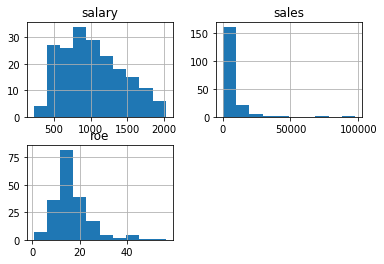

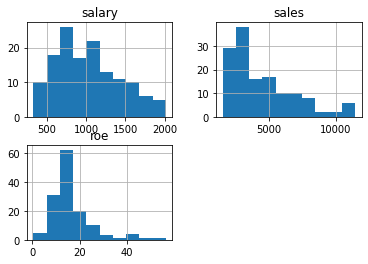

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data2/Ex_CEOSalary.csv', encoding='utf-8')

data['industry'] = data['industry'].replace(
    [1, 2, 3, 4], ['Service', 'IT', 'Finance', 'Others'])

Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

data_IQR = data[(data['salary'] < Q3_salary + IQR_salary) &
                (data['salary'] > Q1_salary - IQR_salary)]
data_IQR.hist()

Q3_sales = data['sales'].quantile(q=0.75)
Q1_sales = data['sales'].quantile(q=0.25)
IQR_sales = Q3_sales - Q1_sales

data_IQR = data[(data['sales'] < Q3_sales + IQR_sales) &
                (data['sales'] > Q1_sales - IQR_salary) & (data['salary'] < Q3_salary + IQR_salary) &
                (data['salary'] > Q1_salary - IQR_salary)]

data_IQR.hist()

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x15166e790>, <matplotlib.lines.Line2D object at 0x15166ea60>], 'caps': [<matplotlib.lines.Line2D object at 0x15166ed00>, <matplotlib.lines.Line2D object at 0x1516680d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x151660ee0>], 'medians': [<matplotlib.lines.Line2D object at 0x1516683d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x151668760>], 'means': []})

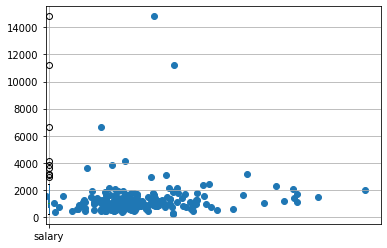

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('./data2/Ex_CEOSalary.csv', encoding='utf-8')

data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

plt.scatter(data['roe'], data['salary'], alpha=1.0)
data.groupby('industry')[['salary']].describe()

data.boxplot(column='salary', return_type='both')


,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647,-0.094616,-0.125441,-0.036050
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,-0.094616,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,-0.125441,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,-0.036050,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


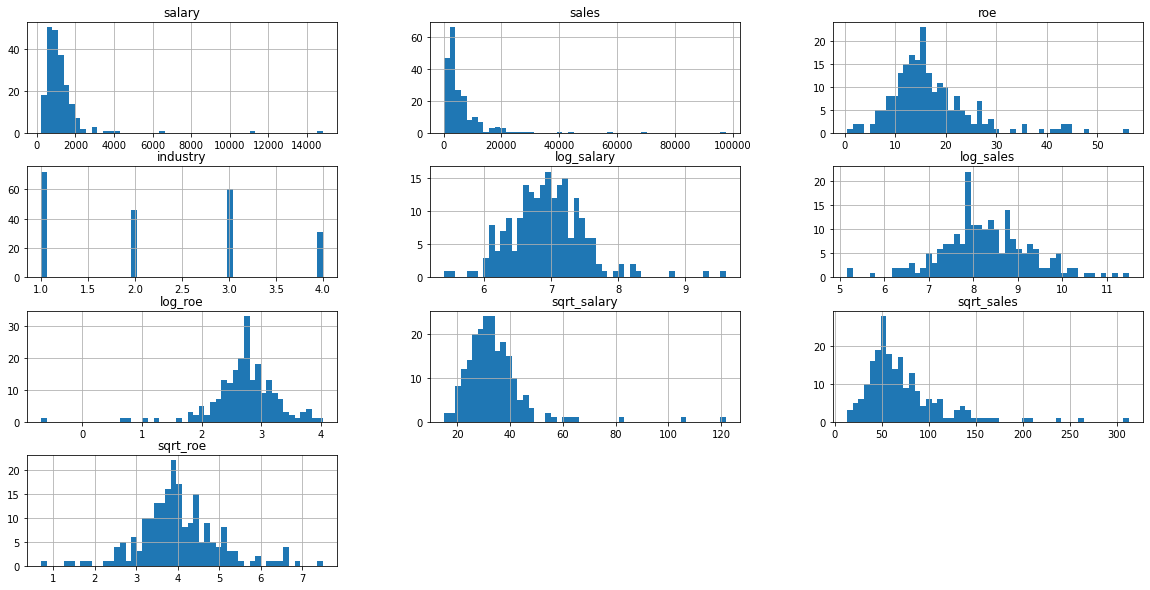

In [18]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data2/Ex_CEOSalary.csv', encoding='utf-8')

data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])

data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])

data.hist(bins=50, figsize=(20,10))
data.corr()
